## Decision Tree Learning Choosing the Best Split

In this notebook you will be writing a Python function to compute the best possible split for a decision tree given some points in the x, y plane and some binary targets.

For starters, we will generate a random decision tree and then plot the points.  The binary targets are noisy realizations of the true underlying decision function (with noise specified by the variable `noise`).

if y > 176.000000:
    if y > 369.000000:
        if x > 138.000000:
            if x > 463.000000:
                if x > 465.000000:
                    if x > 485.000000:
                        return False
                    else:
                        if x > 482.000000:
                            return False
                        else:
                            return True
                else:
                    return True
            else:
                return True
        else:
            return True
    else:
        if x > 202.000000:
            if x > 257.000000:
                return True
            else:
                if x > 232.000000:
                    if x > 235.000000:
                        if x > 244.000000:
                            if y > 318.000000:
                                if x > 256.000000:
                                    if y > 368.000000:
                                        return False
                                  

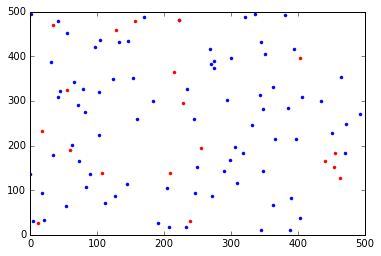

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from learn_interactive import DecisionTree, make_random_tree, canvas_dim
from sklearn.cross_validation import train_test_split

real_tree = make_random_tree()
print real_tree

n_points = 100
noise = 0.2

# generate some noisy labels
points = np.random.randint(0, canvas_dim, (n_points, 2))
labels = np.zeros((points.shape[0],),dtype=np.bool_)

for i in range(len(labels)):
    label, _ = real_tree.evaluate(points[i,0], points[i,1])
    if np.random.rand() < noise:
        label = not label
    labels[i] = label

# plot the points (blue for positive, red for negative)
plt.plot(points[labels==1,0], points[labels==1,1],'b.')
plt.plot(points[labels==0,0], points[labels==0,1],'r.')

### Gini Impurity as a Metric for Best Split

In order to talk about the "best split", we have to have some notion of what "best" means.  There are lots of [possible options](https://en.wikipedia.org/wiki/Decision_tree_learning).  The one we are going to examine here is called "Gini impurity".  The Gini impurity is a measure of the homegeneity of the points in a set.  Suppose that we have a set of $x_1, \ldots, x_n$ with target values $y_1, \ldots, y_n$.  For simplicity, we will assume that each of the target values $y_i \in \{0, 1\}$ (i.e. it is a binary variable).  The Gini impurity of the set is defined as:

\begin{align}
\mbox{gini_impurity}(y_1, \ldots, y_n) =& f_0 \times (1 - f_0) + f_1 \times (1 - f_1)
\end{align}

Where $f_c = \frac{1}{n}\sum_{i=1}^n y_i = c$.  In otherwords $f_c$ is the proportion of points in the set that belong to class $c$.  Since we are dealing with binary target variables, $c$ in this case will either be $0$ or $1$.

**Q:** What is the highest value that gini-impuritycan obtain?  What is the lowest?

In order to relate this back to the concept of the best possible split to our data, consider a possible split of our data.  Specifically, we will consider splits that arise from testing one of the two attributes for each data point (x or y) and comparing it to a threshold (e.g. $x > 50$ or $y > 100$).  Let $y^{p}_1, \ldots, y^{p}_{n_{p}}$  denote the targets for the points that passed the Boolean test, and let $y^{f}_1, \ldots, y^{f}_{n_{f}}$ denote the targets for the points that failed the Boolean test.  The impurity of this split is given by the following formula.

\begin{align}
\mbox{split_impurity}(y_1, \ldots, y_n) =& \frac{n_p}{n}\mbox{gini_impurity}(y^{p}_1, \ldots, y^{p}_{n_{p}}) + \frac{n_f}{n}\mbox{gini_impurity}(y^{f}_1, \ldots, y^{f}_{n_{f}})
\end{align}

That is, the impurity of a split is a weighted combination of the Gini impurity of each resultant subset weighted by the proportion of data that is assigned to each subset.

Fill out the following function stub to compute the best possible split of the data using Gini impurity as a metric.

In [ ]:
def best_split(data, targets):
    """ Find the best split for a given dataset.
        data is an nx2 numpy array where n is the number of data points.  The first column
        of data contains the x coordinates of the points, and the second contains the y
        coordinates.
        targets is an n dimensional numpy array containing the binary target values (0, 1)
        
        returns: a tuple consisting of the variable to split on and the threshold to split at.
                 all splits are evaluated as variable_name > threshold.
        """
    # this starter code is designed to help, but if you want to start from scratch, please
    # go ahead.
    best_impurity = np.inf
    split_variable = None
    split_threshold = None
    variable_names = ['x', 'y']
    for i in range(data.shape[1]):
        for threshold in np.arange(-1.0, canvas_dim+1, 1):
            # loop over all possible splitting variables and thresholds
            pass

split_variable, split_threshold = best_split(points, labels)
print split_variable, split_threshold

In [ ]:
# visualize the best split computed above

plt.plot(points[labels==1,0], points[labels==1,1],'b.')
plt.plot(points[labels==0,0], points[labels==0,1],'r.')
if split_variable == "x":
    plt.plot([split_threshold, split_threshold], [0, canvas_dim], 'k')
else:
    plt.plot([0, canvas_dim],[split_threshold, split_threshold], 'k')